# Ejemplo Básico del Algoritmo de Maximización de la Esperanza

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/3/3d/EM_Process.jpg" width="500px" height="300px" />


> En el notebook anterior derivamos todas las ecuaciones del algoritmo de maximización de la esperanza. Sin duda, este proceso requirió de bastantes matemáticas y concentración, pero lo logramos. Ya que tenemos las ecuaciones, comencemos a utilizarlas con un ejemplo básico.

> **Objetivos:**
> - Aplicar el algoritmo de maximización de la esperanza a un ejemplo sencillo.

> **Referencias:**
> - Bayesian Methods for Machine Learning course, HSE University, Coursera.

## 1. Enunciado: Mezcla discreta

Supongamos que tenemos datos correspondientes al siguiente histograma:

In [1]:
# Importamos matplotlib.pyplot
from matplotlib import pyplot as plt
# Importamos scipy.stats
from scipy import stats
# Importamos numpy
import numpy as np

Text(0, 0.5, 'Freq. rel.')

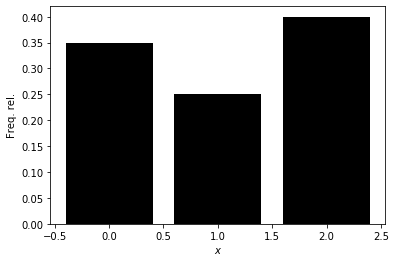

In [2]:
# Graficamos
plt.figure(figsize=(6, 4))
plt.bar([0, 1, 2], [0.35, 0.25, 0.4], color='k')
plt.xlabel('$x$')
plt.ylabel('Freq. rel.')

In [18]:
# Variable aleatoria "real"
X = stats.rv_discrete(
    values=(
        [0, 1, 2],  # x_k
        [0.35, 0.25, 0.4]  # p_k
    )
)

Queremos ajustar una distribución de probabilidad a estos datos, pero **suponiendo que estos datos vienen de una mezcla de distribuciones:**

$$
p(x_i) = \alpha p_1(x_i) + (1 - \alpha) p_2(x_i),
$$

donde

| Distribution | $x=0$    | $x=1$       | $x=2$        |
| ------------ | -------- | ----------- | -----------  |
| $p_1(x)$     | $\beta$  | $1 - \beta$ | $0$          |
| $p_2(x)$     | $0$      | $\delta$    | $1 - \delta$ |

Entonces, una suposición plausible es que tenemos un modelo con variable latente de la siguiente manera:

![latent](figures/latent_model.png)

donde $t_i$ es una variable aleatoria que puede tomar dos valores $1, 2$, y básicamente nos dice a qué distribución pertenece el dato $x_i$.

De esta manera, la distribución previa sobre $t_i$ es:

$$
p(t_i) = \left\lbrace \begin{array}{ccc}
                      \alpha     & \text{si} & t_i = 1 \\
                      1 - \alpha & \text{si} & t_i = 2
                      \end{array}\right.
$$

## 2. Algoritmo de maximización de la esperanza

Para inicializar nuestro algoritmo de maximización de la esperanza definimos:

$$
\alpha^0 = \beta^0 = \delta^0 = 0.5
$$

### 1. E-step

Recordamos que en este paso, queremos encontrar la distribución posterior:

$$
q(t_i = c) = p(t_i=c | x_i)
$$

¿A qué es igual $p(t_i | x_i)$? Usando Bayes (recordar que: $p(x_i | t_i=c) = p_c(x_i)$):

\begin{align}
p(t_i | x_i) & = \frac{p(x_i | t_i) p(t_i)}{p(x_i)} \\
             & = \frac{p(x_i | t_i) p(t_i)}{p(x_i | t_i=1)p(t_i=1) + p(x_i | t_i=2)p(t_i=2)} \\
             & = \frac{p(x_i | t_i) p(t_i)}{\alpha p_1(x_i)) + (1 - \alpha)p_2(x_i)}.
\end{align}

Resumamos lo anterior en una tabla:

| $x_i$ \ $t_i$ | $1$                                                          | $2$                                                                  |
| ------------- | ------------------------------------------------------------ | -------------------------------------------------------------------- |
| $0$           | $\frac{\beta\alpha}{\alpha\beta + (1-\alpha)0} = 1$          | $\frac{0(1-\alpha)}{\alpha\beta + (1-\alpha)0}=0$                    |
| $1$           | $\frac{(1-\beta)\alpha}{\alpha(1-\beta) + (1-\alpha)\delta}$ | $\frac{\delta(1-\alpha)}{\alpha(1-\beta) + (1-\alpha)\delta}$        |
| $2$           | $\frac{0 \alpha}{\alpha 0 + (1-\alpha)(1 - \delta)} = 0$     | $\frac{(1-\delta)(1-\alpha)}{\alpha 0 + (1-\alpha)(1 - \delta)} = 1$ |

En particular, para los parámetros iniciales $\alpha^0 = \beta^0 = \delta^0 = 0.5$, tenemos que:

$$
\frac{(1-\beta^0)\alpha^0}{\alpha^0(1-\beta^0) + (1-\alpha^0)\delta^0} = \frac{0.5 \times 0.5}{0.5 \times 0.5 + 0.5 \times 0.5} = 0.5,
$$

y

$$
\frac{\delta^0(1-\alpha^0)}{\alpha^0(1-\beta^0) + (1-\alpha^0)\delta^0} = \frac{0.5 \times 0.5}{0.5 \times 0.5 + 0.5 \times 0.5} = 0.5.
$$

En resumen:

$$
q^1(t_i = 1) = p(t_i=1 | x_i) = \left \lbrace \begin{array}{ccc}
                                              1   & \text{si} & x_i=0 \\
                                              0.5 & \text{si} & x_i=1 \\
                                              0   & \text{si} & x_i=2
                                              \end{array}\right .
$$

y $q^1(t_i = 2) = 1 - q^1(t_i = 1)$.

### 2. M-step

Ahora, queremos maximizar:

\begin{align}
\max_{\alpha, \beta, \delta} \sum_{i=1}^{N} \mathbb{E}_{q^{1}(t_i)} \left[\log p(x_i, t_i)\right]
& = \max_{\alpha, \beta, \delta} \sum_{i=1}^{N} \mathbb{E}_{q^{1}(t_i)} \left[\log p(x_i | t_i) p(t_i)\right] \\
& = \max_{\alpha, \beta, \delta} \sum_{i=1}^{N} \left[q^1(t_i = 1) \log p(x_i | t_i=1) p(t_i = 1) + q^1(t_i = 2) \log p(x_i | t_i=2) p(t_i = 2)\right] \\
& = \max_{\alpha, \beta, \delta} \sum_{i=1}^{N} \left[q^1(t_i = 1) \log p_1(x_i) \alpha + q^1(t_i = 2) \log p_2(x_i) (1 - \alpha)\right]
\end{align}

Notemos que para este punto, la expresión de arriba dependerá de:

- $N_0$: cantidad de datos que tenemos $x=0$,
- $N_1$: cantidad de datos que tenemos $x=1$,
- $N_2$: cantidad de datos que tenemos $x=2$.

De esta manera:

\begin{align}
\sum_{i=1}^{N}\mathbb{E}_{q^{1}(t_i)} \left[\log p(x_i, t_i)\right]
& = \sum_{i=1}^{N} \left[q^1(t_i = 1) \log p_1(x_i) \alpha + q^1(t_i = 2) \log p_2(x_i) (1 - \alpha)\right] \\
& = N_0 \left[\log \beta \alpha\right] + N_1 \left[0.5 \log (1 - \beta) \alpha + 0.5 \log \delta (1 - \alpha)\right] + N_2 \left[\log (1 - \delta) (1 - \alpha)\right]
\end{align}

Para maximizar lo anterior respecto a los parámetros $\alpha, \beta, \delta$, derivamos respecto a cada parámetro e igualamos a cero:


$$
\frac{\partial}{\partial \alpha}\sum_{i=1}^{N}\mathbb{E}_{q^{1}(t_i)} \left[\log p(x_i, t_i)\right] = N_0 \frac{1}{\alpha} + 0.5 N_1 \frac{1}{\alpha} - 0.5 N_1 \frac{1}{1 - \alpha} - N_2 \frac{1}{1 - \alpha} = 0 \Rightarrow \alpha^1 = \frac{N_0 + 0.5 N_1}{N_0 + N_1 + N_2}.
$$

## Tarea

Demostrar que:

$$
\beta^1 = \frac{2 N_0}{2 N_0 + N_1}, \qquad \text{ y } \qquad \delta^1 = \frac{N_1}{N_1 + 2 N_2}
$$

## 3. Visualización

Primero veamos en nuestra inicialización, cómo luce la aproximación:

In [5]:
# Parámetros en la inicialización
a0, b0, d0 = 0.5, 0.5, 0.5

In [25]:
# Aproximación de la distribución en la inicialización
p10 = np.array([b0, 1 - b0, 0])
p20 = np.array([0, d0, 1 - d0])
p_approx0 = a0 * p10 + (1 - a0) * p20
p_approx0

array([0.25, 0.5 , 0.25])

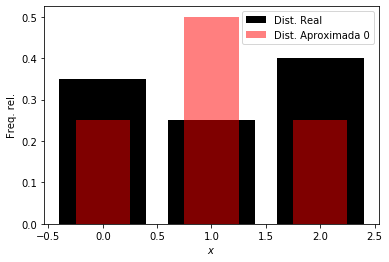

In [26]:
# Graficamos
plt.figure(figsize=(6, 4))
plt.bar([0, 1, 2], [0.35, 0.25, 0.4], color='k', label="Dist. Real")
plt.bar([0, 1, 2], p_approx0, color='r', alpha=0.5, width=0.5, label="Dist. Aproximada 0")
plt.xlabel('$x$')
plt.ylabel('Freq. rel.')
plt.legend()

Ahora, en nuestra **primera iteración**:

In [21]:
# Hacemos las cuentas
data = X.rvs(size=100)
data

array([0, 0, 1, 1, 1, 1, 2, 0, 2, 1, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 1,
       2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 2, 2, 0,
       2, 1, 1, 2, 2, 0, 1, 2, 2, 2, 2, 0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 1, 2, 2, 1, 0, 2, 0, 2, 0, 0, 0,
       2, 2, 1, 1, 2, 2, 1, 0, 0, 0, 1, 2])

In [22]:
N0 = (data == 0).sum()
N1 = (data == 1).sum()
N2 = (data == 2).sum()
N0, N1, N2

(34, 23, 43)

In [23]:
# Parámetros en la primera iteración
a1 = (N0 + 0.5 * N1) / (N0 + N1 + N2)
b1 = (2 * N0) / (2 * N0 + N1)
d1 = N1 / (N1 + 2 * N2)
a1, b1, d1

(0.455, 0.7472527472527473, 0.21100917431192662)

In [27]:
# Aproximación de la distribución en la primera iteración
p11 = np.array([b1, 1 - b1, 0])
p21 = np.array([0, d1, 1 - d1])
p_approx1 = a1 * p11 + (1 - a1) * p21
p_approx1

array([0.34, 0.23, 0.43])

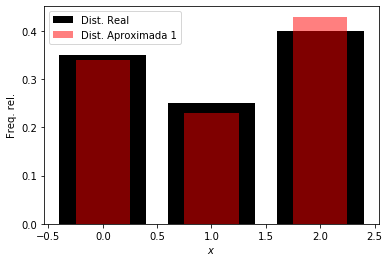

In [29]:
# Graficamos
plt.figure(figsize=(6, 4))
plt.bar([0, 1, 2], [0.35, 0.25, 0.4], color='k', label="Dist. Real")
plt.bar([0, 1, 2], p_approx1, color='r', alpha=0.5, width=0.5, label="Dist. Aproximada 1")
plt.xlabel('$x$')
plt.ylabel('Freq. rel.')
plt.legend()

¡Solo en la primera iteración ya tenemos una aproximación bastante aceptable!

# Anuncios parroquiales

## 1. Quiz del tema 2 - AME, el martes 25 de Octubre.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>